PROJECT ROTTEN_TOMATOES
The objective of this project is to predict the outcome of a movie - If it is FRESH or ROTTEN
FRESH  would mean the movie is good, well liked by the audience
ROTTEN would mean the movie has no takers.



In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('rotten_tomatoes_movies.csv')
df.head(10)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3
5,m/10000_bc,"10,000 B.C.",Mammoth hunter D'Leh (Steven Strait) has long ...,With attention strictly paid to style instead ...,PG-13,"Action & Adventure, Classics, Drama",Roland Emmerich,"Harald Kloser, Roland Emmerich","Steven Strait, Camilla Belle, Cliff Curtis, Jo...",2008-03-07,...,Warner Bros. Pictures,Rotten,8.0,149.0,Spilled,37.0,411140.0,37,12,137
6,m/1000121-39_steps,The 39 Steps,"While on vacation in London, Canadian Richard ...","Packed with twists and turns, this essential e...",NR,"Action & Adventure, Classics, Mystery & Suspense",Alfred Hitchcock,"Alma Reville, Charles Bennett, Ian Hay, Alfred...","Robert Donat, Madeleine Carroll, Godfrey Tearl...",1935-08-01,...,Gaumont British Distributors,Certified-Fresh,96.0,51.0,Upright,86.0,23890.0,8,49,2
7,m/1000123-310_to_yuma,3:10 to Yuma,"Dan Evans (Van Heflin), a drought-plagued Ariz...",NaN,NR,"Classics, Drama, Western",Delmer Daves,Halsted Welles,"Glenn Ford, Van Heflin, Felicia Farr, Leora Da...",1957-08-07,...,Columbia Pictures,Fresh,96.0,28.0,Upright,79.0,9243.0,6,27,1
8,m/10002008-charly,Charly (A Heartbeat Away),"Cultural differences, past loves and personal ...",NaN,PG,"Comedy, Drama, Romance",Adam Thomas Anderegg,"Jack Weyland, Janine Whetton Gilbert","Heather Beers, Gary Neilson, Lisa McCammon, Ja...",2002-09-27,...,Excel Entertainment,Rotten,20.0,10.0,Upright,87.0,4819.0,0,2,8
9,m/1000204-abraham_lincoln,Abraham Lincoln,The 16th U.S. president (Walter Huston) is por...,NaN,NR,"Classics, Drama",D.W. Griffith,"Gerrit J. Lloyd, Stephen Vincent Benét","Walter Huston, Una Merkel, Kay Hammond, Ian Ke...",1930-11-08,...,United Artists,Fresh,82.0,11.0,Spilled,40.0,457.0,4,9,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17712 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17518 non-null  object 
 7   authors                           16170 non-null  object 
 8   actors                            17360 non-null  object 
 9   original_release_date             16546 non-null  object 
 10  streaming_release_date            17328 non-null  object 
 11  runtime                           17398 non-null  float64
 12  prod

DATA ANALYSIS & EDA

Output --> y --> Tomatometer status.

Lets only keep features that aid predictions of tomatometer status. By visual inspection, these come across as the most important features 
to determine the outcome of the tomatometer status

1. Content_rating   
2. Runtime
3. Tomatometer rating
4. Audience status
5. Audience rating
6. Audience count

Thus, we decided to keep 6 features to make an output prediction on if the tomatometer's rating will be FRESH or ROTTEN
Let's check the shape before we even remove the unwanted columns

In [4]:
df.shape

(17712, 22)

Thus, we have 17,712 entries and 22 columns. Now let's run a bunch of trimming techniques to remove unwanted data.

In [5]:
df.isnull().sum()


rotten_tomatoes_link                   0
movie_title                            0
movie_info                           321
critics_consensus                   8578
content_rating                         0
genres                                19
directors                            194
authors                             1542
actors                               352
original_release_date               1166
streaming_release_date               384
runtime                              314
production_company                   499
tomatometer_status                    44
tomatometer_rating                    44
tomatometer_count                     44
audience_status                      448
audience_rating                      296
audience_count                       297
tomatometer_top_critics_count          0
tomatometer_fresh_critics_count        0
tomatometer_rotten_critics_count       0
dtype: int64

The below run confirms that we have multiple entries with null values. LEt's go ahead and get rid of all of them

In [6]:
#Drop duplicates, and NAN's, and try to check the shape again
df1 = df.drop_duplicates()
df2 = df1.dropna()
df2.shape

(8077, 22)

This is an excellent reduction. We have filtered out useless values and now remain with 8077 entries.

In [7]:
df.nunique()

rotten_tomatoes_link                17712
movie_title                         17106
movie_info                          17389
critics_consensus                    9132
content_rating                          6
genres                               1106
directors                            8933
authors                             12989
actors                              17330
original_release_date                5804
streaming_release_date               2271
runtime                               190
production_company                   3046
tomatometer_status                      3
tomatometer_rating                    101
tomatometer_count                     407
audience_status                         2
audience_rating                        98
audience_count                      11069
tomatometer_top_critics_count          69
tomatometer_fresh_critics_count       359
tomatometer_rotten_critics_count      206
dtype: int64

These represent the number of unique values in the dataframe

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,classification_report

In [9]:
X = df2[['content_rating','runtime','tomatometer_rating','audience_status','audience_rating','audience_count']]
y = df2[['tomatometer_status']]


In [10]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8077 entries, 0 to 17710
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tomatometer_status  8077 non-null   object
dtypes: object(1)
memory usage: 126.2+ KB


Now, we have reduced the data to 8 culumns and have assigned X and y.
Categorical features --> content_rating, genres,production_company, audience_status
Numerical features --> runtime, tomatometer_rating, audience_rating, audience_count

Now, let's investigate each categorical feature
1. Audience Status has only 2 unique values. Let's use Ordinal encoding to replace this with 0,1

Audience status unique value count is:['Spilled' 'Upright']


[Text(0, 0, '4703'), Text(0, 0, '3374')]

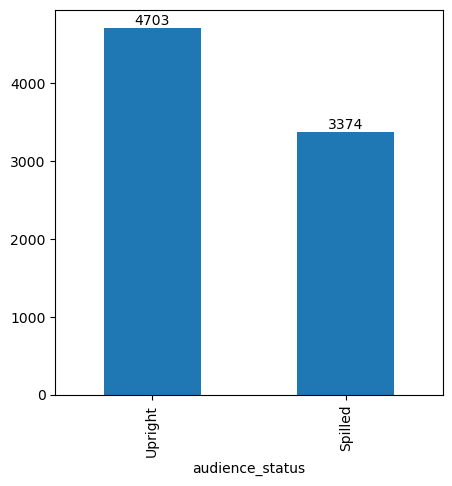

In [11]:
print(f"Audience status unique value count is:{X.audience_status.unique()}")
bar_g = X.audience_status.value_counts().plot(kind='bar',figsize=(5,5))
bar_g.bar_label(bar_g.containers[0])


In [12]:
#Spilled --> 0, Upright --> 1
X['audience_status'] = pd.DataFrame(X.audience_status.replace(['Spilled','Upright'],[0,1]))


Lets also do Ordinal Encoding for tomatometer_rating. It has 3 unique values.

Tomatometer unique value count is:['Rotten' 'Certified-Fresh' 'Fresh']


[Text(0, 0, '3419'), Text(0, 0, '2748'), Text(0, 0, '1910')]

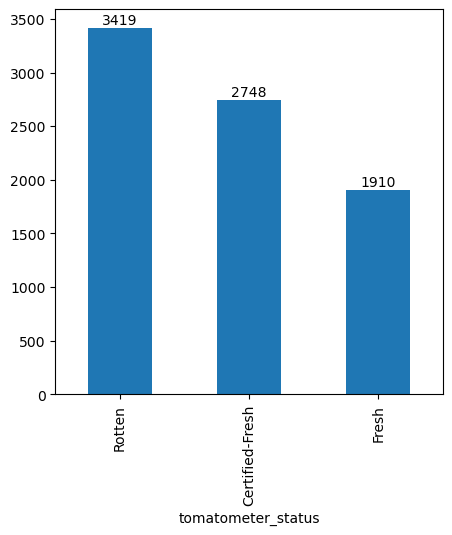

In [13]:
print(f"Tomatometer unique value count is:{y.tomatometer_status.unique()}")
bar_g = y.tomatometer_status.value_counts().plot(kind='bar',figsize=(5,5))
bar_g.bar_label(bar_g.containers[0])

Apply Ordinal Encoder with these values
Rotten -- 0
Certified fresh -- 1
Fresh -- 2

In [14]:
y['tomatometer_status'] = pd.DataFrame(y.tomatometer_status.replace(['Rotten','Certified-Fresh','Fresh'],[0,1,2]))
y.head(5)

,tomatometer_status
0,0
1,1
2,2
3,1
4,2


In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8077 entries, 0 to 17710
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   content_rating      8077 non-null   object 
 1   runtime             8077 non-null   float64
 2   tomatometer_rating  8077 non-null   float64
 3   audience_status     8077 non-null   int64  
 4   audience_rating     8077 non-null   float64
 5   audience_count      8077 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 441.7+ KB


In [16]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8077 entries, 0 to 17710
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   tomatometer_status  8077 non-null   int64
dtypes: int64(1)
memory usage: 126.2 KB


Now, lets examine content_rating. It is a categorical feature.

Audience status unique value count is:['PG' 'R' 'NR' 'G' 'PG-13' 'NC17']


[Text(0, 0, '3589'),
 Text(0, 0, '2030'),
 Text(0, 0, '1115'),
 Text(0, 0, '1037'),
 Text(0, 0, '283'),
 Text(0, 0, '23')]

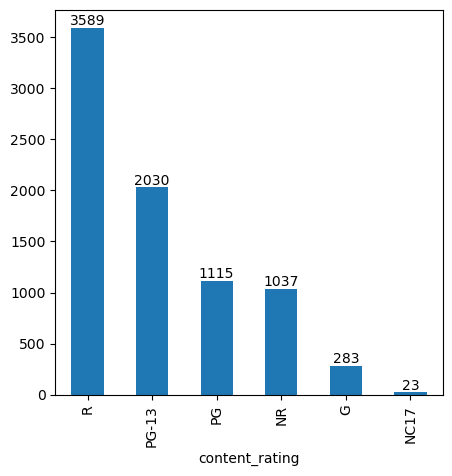

In [17]:
print(f"Audience status unique value count is:{X.content_rating.unique()}")
bar_g = X.content_rating.value_counts().plot(kind='bar',figsize=(5,5))
bar_g.bar_label(bar_g.containers[0])

The content rating is a categorical feature with 6 unique features. 
Also the order of magnitude is not very important, hence use One Hot encoding technique.


TEST AND TRAIN SPLIT
Now split the data into training and testing data - 75% to 20%

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
print(f"Size of training data is:{len(X_train)}")
print(f"Size of test data is:{len(X_test)}")

Size of training data is:6057
Size of test data is:2020


Building a basic model - Let's try to use KNN and Tree Classifier

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from datetime import datetime

In [20]:
%%time
#Test the K neighbors classification with the default parameters
from sklearn.neighbors import KNeighborsClassifier 
ohe = OneHotEncoder()
column_trans = make_column_transformer((ohe,['content_rating']),
                                        remainder='passthrough')

KNN=KNeighborsClassifier(n_neighbors=3)

pipe = make_pipeline(column_trans,KNN)
pipe.fit(X_train,y_train)

CPU times: total: 62.5 ms
Wall time: 78.3 ms


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['content_rating'])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

In [21]:
y_pred=pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)

report = classification_report(y_test,y_pred)
print(f"Classification  report is as follows :\n {report} ")

acc_tr_knn = accuracy_score(y_train,y_train_pred)*100
acc_te_knn = accuracy_score(y_test,y_pred)*100

print(f"Accuracy of the training model is {accuracy_score(y_train,y_train_pred)*100} ")
print(f"Accuracy of the testing model is {accuracy_score(y_test,y_pred)*100} ")

Classification  report is as follows :
               precision    recall  f1-score   support

           0       0.64      0.79      0.71       847
           1       0.53      0.45      0.49       698
           2       0.36      0.29      0.32       475

    accuracy                           0.55      2020
   macro avg       0.51      0.51      0.51      2020
weighted avg       0.54      0.55      0.54      2020
 
Accuracy of the training model is 77.29899290077597 
Accuracy of the testing model is 55.44554455445545 


DECISION TREE for comparision


In [22]:
%%time
#Decision tree classifier with the default parameters
from sklearn.tree import DecisionTreeClassifier
ohe = OneHotEncoder()
column_trans = make_column_transformer((ohe,['content_rating']),
                                        remainder='passthrough')

dtree=DecisionTreeClassifier()

pipe = make_pipeline(column_trans,dtree)
pipe.fit(X_train,y_train)

CPU times: total: 62.5 ms
Wall time: 67 ms


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['content_rating'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [23]:
y_pred=pipe.predict(X_test)
print(f"Accuracy of the model is {accuracy_score(y_test,y_pred)*100} ")
y_train_pred = pipe.predict(X_train)
print(f"Accuracy of the training model is {accuracy_score(y_train,y_train_pred)*100} ")

report = classification_report(y_test,y_pred)
print(f"\nClassification  report is as follows :\n {report} ")

acc_tr_dt = accuracy_score(y_train,y_train_pred)*100
acc_te_dt = accuracy_score(y_test,y_pred)*100

Accuracy of the model is 85.64356435643565 
Accuracy of the training model is 100.0 

Classification  report is as follows :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       847
           1       0.81      0.77      0.79       698
           2       0.68      0.73      0.70       475

    accuracy                           0.86      2020
   macro avg       0.83      0.83      0.83      2020
weighted avg       0.86      0.86      0.86      2020
 


IMPROVE THE ACCURACY
Lets evaluate audience_count  -- 
The audience count has 11069 values which is very huge and unwanted. It makes the model unstable
Rerun the model removing audience_count metric

In [24]:
X1 = X[['content_rating','runtime','tomatometer_rating','audience_status','audience_rating']]
y1 = y[['tomatometer_status']]
X1.info()
#Now we have thus eliminated the audience_count column

<class 'pandas.core.frame.DataFrame'>
Index: 8077 entries, 0 to 17710
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   content_rating      8077 non-null   object 
 1   runtime             8077 non-null   float64
 2   tomatometer_rating  8077 non-null   float64
 3   audience_status     8077 non-null   int64  
 4   audience_rating     8077 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 378.6+ KB


In [25]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.25)
print(f"Size of training data is:{len(X1_train)}")
print(f"Size of test data is:{len(X1_test)}")

#Test the K neighbors classification with the default parameters
ohe = OneHotEncoder()
column_trans = make_column_transformer((ohe,['content_rating']),
                                        remainder='passthrough')

KNN=KNeighborsClassifier(n_neighbors=3)

pipe = make_pipeline(column_trans,KNN)
pipe.fit(X1_train,y1_train)

y1_pred=pipe.predict(X1_test)
y1_train_pred = pipe.predict(X1_train)

report = classification_report(y1_test,y1_pred)
print(f"Classification  report is as follows :\n {report} ")

print(f"Accuracy of the training model is {accuracy_score(y1_train,y1_train_pred)*100} ")
print(f"Accuracy of the testing model is {accuracy_score(y1_test,y1_pred)*100} ")

acc_tr_knn = accuracy_score(y1_train,y1_train_pred)*100
acc_te_knn = accuracy_score(y1_test,y1_pred)*100

Size of training data is:6057
Size of test data is:2020
Classification  report is as follows :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       875
           1       0.78      0.84      0.81       672
           2       0.73      0.65      0.68       473

    accuracy                           0.86      2020
   macro avg       0.83      0.83      0.83      2020
weighted avg       0.86      0.86      0.86      2020
 
Accuracy of the training model is 91.64602938748556 
Accuracy of the testing model is 85.99009900990099 


DEcision Tree - 2nd run

In [26]:
ohe = OneHotEncoder()
column_trans = make_column_transformer((ohe,['content_rating']),
                                        remainder='passthrough')

dtree=DecisionTreeClassifier()

pipe = make_pipeline(column_trans,dtree)
pipe.fit(X1_train,y1_train)
y1_pred=pipe.predict(X1_test)
print(f"Accuracy of the testing model is {accuracy_score(y1_test,y1_pred)*100} ")
y1_train_pred = pipe.predict(X1_train)
print(f"Accuracy of the training model is {accuracy_score(y1_train,y1_train_pred)*100} ")

report = classification_report(y1_test,y1_pred)
print(f"\nClassification  report is as follows :\n {report} ")

acc_tr_dt = accuracy_score(y1_train,y1_train_pred)*100
acc_te_dt = accuracy_score(y1_test,y1_pred)*100

Accuracy of the testing model is 85.6930693069307 
Accuracy of the training model is 99.86792141324088 

Classification  report is as follows :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       875
           1       0.78      0.79      0.79       672
           2       0.70      0.69      0.69       473

    accuracy                           0.86      2020
   macro avg       0.83      0.83      0.83      2020
weighted avg       0.86      0.86      0.86      2020
 


Thus at the end of 2 iterations, we can confidently say both Decision Tree and KNN yield a very good accuracy rate of around 85%


In [27]:
#Build a data frame with the necessary parameters to display
model_data = [  ('KNN',acc_tr_knn,acc_te_knn),
                ('Decision_Tree',acc_tr_dt,acc_te_dt)
             ]
model_comp = pd.DataFrame(model_data,columns=['Model_Name','Training_Accuracy','Testing_Accuracy'])
model_comp

,Model_Name,Training_Accuracy,Testing_Accuracy
0,KNN,91.646029,85.990099
1,Decision_Tree,99.867921,85.693069


Hypertuning of Decision tree using Gridsearchcv to determine the best 'maxdepth'

In [28]:
from sklearn.model_selection import GridSearchCV

ohe = OneHotEncoder()
column_trans = make_column_transformer((ohe,['content_rating']),
                                        remainder='passthrough')

dtree=DecisionTreeClassifier(criterion='entropy')
dtree_params = [{"max_depth":[2,3,4,5]}]
grid_search = GridSearchCV(dtree,param_grid=dtree_params,scoring='accuracy')

pipe = make_pipeline(column_trans,grid_search)
pipe.fit(X1_train,y1_train)

grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [29]:
y1_test_pred = pipe.predict(X1_test)
test_run_1 = accuracy_score(y1_test,y1_test_pred)*100

In [30]:
model_data1 = [ 
                ('Decision_Tree',acc_tr_dt,acc_te_dt,test_run_1)
             ]
model_comp1 = pd.DataFrame(model_data1,columns=['Model_Name','Training_Accuracy','Testing_Accuracy','Testing_Acc_gridcv'])
model_comp1

,Model_Name,Training_Accuracy,Testing_Accuracy,Testing_Acc_gridcv
0,Decision_Tree,99.867921,85.693069,89.356436


************************Summary of findings********************************
Objective was to predict the tomatometer ratings of Rotten Tomatoes website
Eventually the goal could be to predict the box office outcome of movies

https://www.kaggle.com/datasets/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset?select=rotten_tomatoes_movies.csv

1. Data trimming happened to eliminate all duplicate, null, nan values 
2. Ordinal Encoding and One hot encoding were applied to non numerical values
3. With detailed data analysis, we concluded to use these input features would 
work best
     0   content_rating      8077 non-null   object 
     1   runtime             8077 non-null   float64
     2   tomatometer_rating  8077 non-null   float64
     3   audience_status     8077 non-null   int64  
     4   audience_rating     8077 non-null   float64
4. The data set was divided into training and testing data set (75/25)
5. KNN and Decision Tree models were used to train and test the data
6. Decision tree performed better with 85% accuracy rate, however KNN 
   struggled at around 55% accuracy rate
7. We then decided to remove audience count metric and re-run the modeling
At this point both models (KNN, Decision Tree) performed well with around 86% accuracy
8. Hyper tuning of the parameters happened for Decision tree and it was found that 
with max tree depth of 5, the accuracy of the Decision tree model hit around 90%
